# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

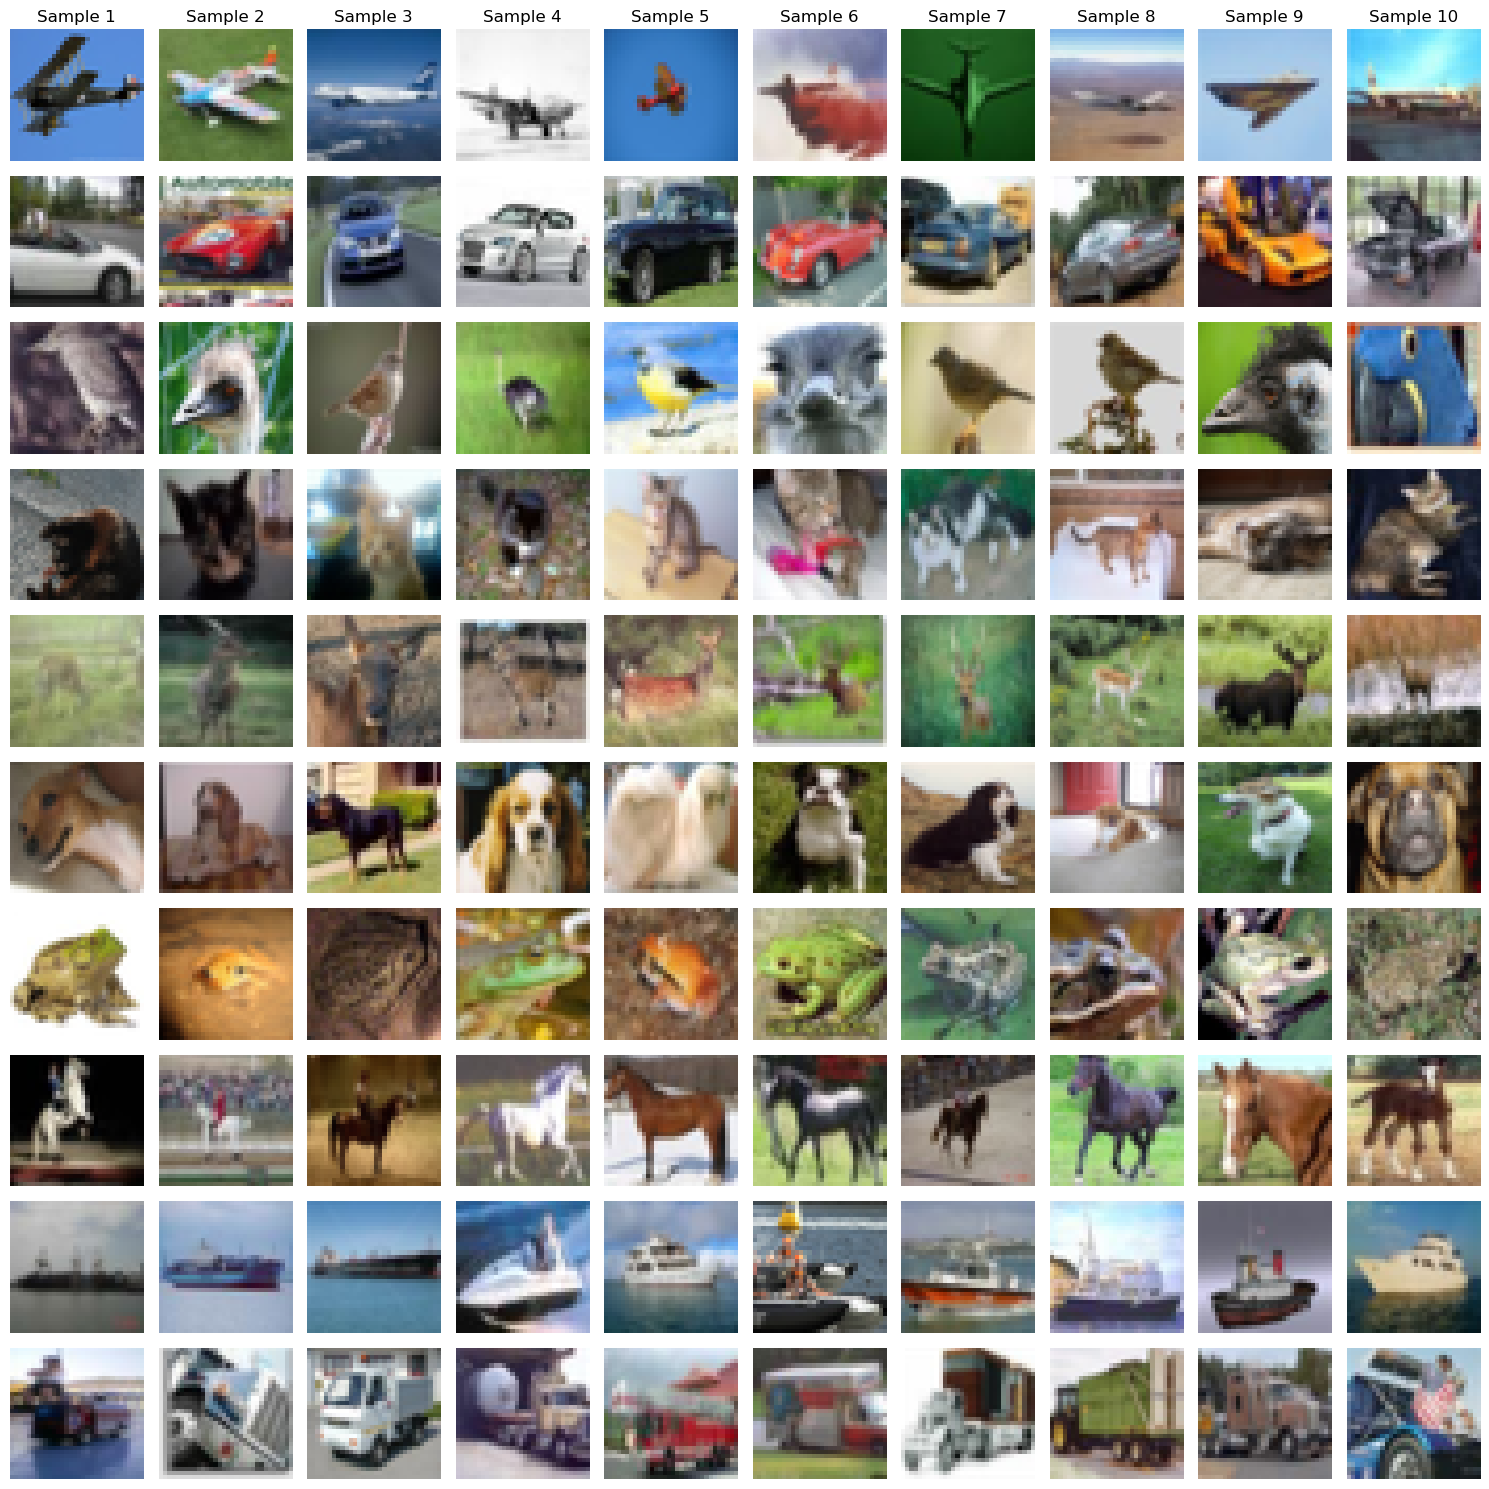

In [61]:
# Plot 10 randomly chosen images for each of the 10 classes from the CIFAR-10 dataset

fig, axes = plt.subplots(10, 10, figsize=(15,15))

classes = np.unique(y_train)
for i, c in enumerate(classes):
    idxs = np.flatnonzero(y_train == c)
    idxs = np.random.choice(idxs, 10, replace=False)
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[idxs[j]], aspect='auto')
        ax.axis('off')
    if i == 0:
        for j, col in enumerate(['Sample {}'.format(i + 1) for i in range(10)]):
            axes[i, j].set_title(col)

plt.tight_layout()
plt.show()



In [62]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [63]:
# Normalize image data from 0-255 to 0-1 (min-max scaling)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0


In [64]:
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train_one_hot.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test_one_hot.shape)


Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [65]:
from keras.backend import clear_session
clear_session()

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the pooling layer to prepare it for the dense layer
model.add(Flatten())

# Add a dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Classification layer with softmax activation for 10 classes
model.add(Dense(10, activation='softmax'))


c:\Users\s83me\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [67]:
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer and categorical_crossentropy loss
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [68]:
from tensorflow.keras.utils import to_categorical

# Encoding categorical labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Normalize the image data
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255


In [74]:
# Train the model
history1 = model.fit(x_train_normalized, y_train_one_hot,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_normalized, y_test_one_hot))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 466ms/step - accuracy: 0.1405 - loss: 2.2765 - val_accuracy: 0.2319 - val_loss: 2.1568
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.2537 - loss: 2.1161 - val_accuracy: 0.2886 - val_loss: 2.0153
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.3005 - loss: 1.9779 - val_accuracy: 0.3246 - val_loss: 1.9056
Epoch 4/50
 3/98 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.3273 - loss: 1.9117

*   Plot the cross entropy loss curve and the accuracy curve

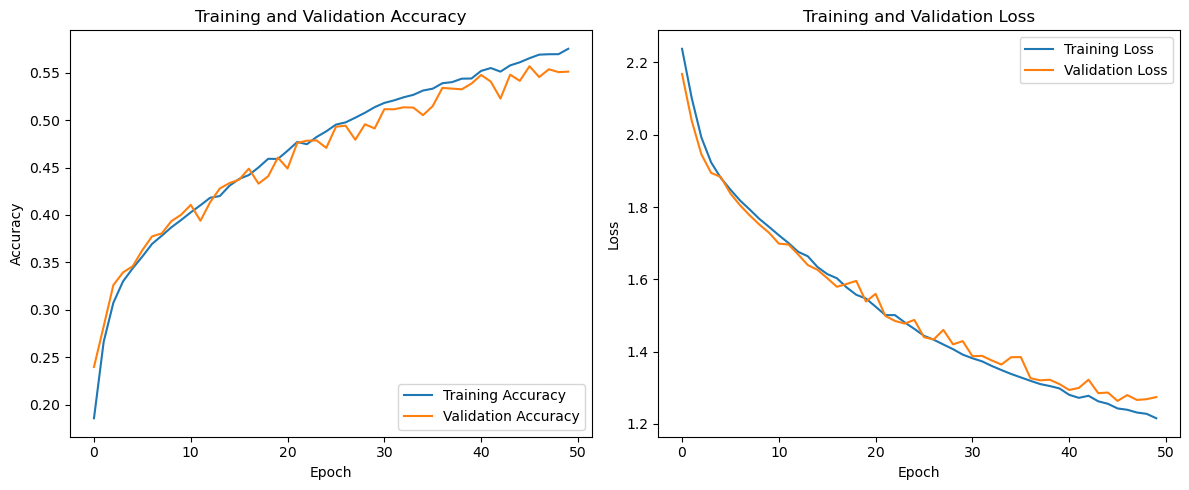

In [36]:
import matplotlib.pyplot as plt

# Set the size of the plots
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [69]:
from keras.backend import clear_session
clear_session()

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer


In [71]:
model = Sequential([
    # Input layer explicitly stating input shape
    InputLayer(input_shape=(32, 32, 3)),

    # First block of two convolutional layers
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    
    # First MaxPooling to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the pooling layer to transition to dense layers
    Flatten(),

    # Dense layer with 128 units
    Dense(128, activation='relu'),

    # Classification layer with softmax activation for 10 classes
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\s83me\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [72]:
from tensorflow.keras.optimizers import SGD

# Compile the model using SGD optimizer, categorical crossentropy loss, and track accuracy
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
history2= model.fit(x_train_normalized, y_train_one_hot, 
                    epochs=50, 
                    batch_size=512, 
                    validation_data=(x_test_normalized, y_test_one_hot))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 428ms/step - accuracy: 0.1515 - loss: 2.2651 - val_accuracy: 0.2474 - val_loss: 2.1219
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.2675 - loss: 2.0761 - val_accuracy: 0.3103 - val_loss: 1.9771
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 480ms/step - accuracy: 0.3012 - loss: 1.9789 - val_accuracy: 0.3325 - val_loss: 1.8881
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 428ms/step - accuracy: 0.3328 - loss: 1.8974 - val_accuracy: 0.3508 - val_loss: 1.8512
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 398ms/step - accuracy: 0.3504 - loss: 1.8620 - val_accuracy: 0.3636 - val_loss: 1.7995
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.3661 - loss: 1.8015 - val_accuracy: 0.3764 - val_loss: 1.7782
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.3782 - loss: 1.7709 - val_accuracy: 0.3856 - val_loss: 1.7361
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.3869 - loss: 1.7424 - val_accu

KeyboardInterrupt: 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

NameError: name 'history1' is not defined

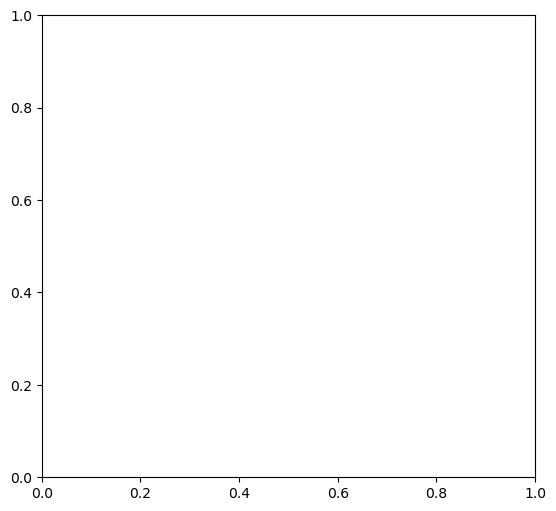

In [73]:
import matplotlib.pyplot as plt

# 'history1' is for the simpler model and 'history2' is for the VGG-like model
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Simple Model Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Simple Model Validation Accuracy')
plt.plot(history2.history['accuracy'], label='VGG-like Model Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='VGG-like Model Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Simple Model Training Loss')
plt.plot(history1.history['val_loss'], label='Simple Model Validation Loss')
plt.plot(history2.history['loss'], label='VGG-like Model Training Loss')
plt.plot(history2.history['val_loss'], label='VGG-like Model Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [13]:
# Your code here :

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

-Activation functions introduce non-linearity, making the model more expressive.
Gradient-based optimization: Some activation functions help backpropagation by keeping gradients from vanishing or exploding (e.g., ReLU).
Decision-making thresholds: Some activations (like Sigmoid) squash values to a range that can be interpreted as probabilities or classifications.

2 - Key Differences between sigmoid and softmax:

-Sigmoid squashes the input value to a range between 0 and 1. Each input is independently mapped to a probability-like value.
Use Case: It’s often used in binary classification problems or for individual neurons in hidden layers where a decision between two classes (0 or 1) is needed.
Characteristics: The sigmoid function is prone to the vanishing gradient problem, which can make training deep networks slower.

-Softmax converts a vector of values into probabilities that sum up to 1, where each value represents the relative probability of a class. It's applied to multi-class classification problems where only one class needs to be predicted.
Use Case: Softmax is used in the output layer of a neural network when you have multiple classes (multi-class classification).
Characteristics: It’s particularly effective when you need to predict one category out of many (i.e., for multi-class classification).
Key Difference:

Sigmoid works on a single output (independent of others), and each output is between 0 and 1.
Softmax compares all outputs and ensures they sum up to 1, giving a relative probability distribution over multiple classes.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy is used in multi-class classification tasks where each instance belongs to one of several classes. The target is typically one-hot encoded (e.g., [1, 0, 0] for class 1, [0, 1, 0] for class 2, etc.).
Characteristics: This loss function considers multiple output neurons and calculates the loss based on the predicted probabilities for each class and the actual class label.
Key Difference:

Binary crossentropy is used for problems with two classes (binary classification).
Categorical crossentropy is used for problems with more than two classes (multi-class classification).
_
